In [6]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

This task covers topics on the lesson on [time series](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-7-time-series.html). 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/ht-oliver/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/131OnUDOLpOl94SlaMU9nGqT998ABrjFS/edit?usp=sharing&ouid=111507336322611936333&rtpof=true&sd=true) before starting.

- **Make at least 5 commits. Generally, commit every time you finish a major step.** We'll check your repository and view the commit history.

- **Add comments for all your code.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

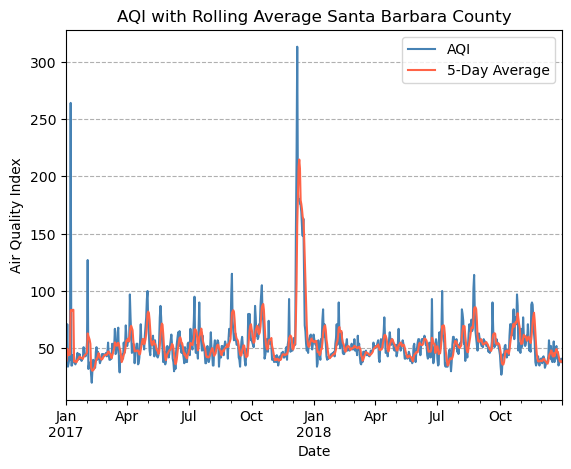

In [ ]:
# Import packages
import pandas as pd
import numpy as np

# Read in data - stack two dataframes
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')
aqi = pd.concat([aqi_17, aqi_18])

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )

# Make a new table by filtering aqi df for Santa Barbara county, and removing unnecessary columns
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara'].drop(['state_name', 'county_name', 'state_code', 'county_code'], axis = 1)

# Use pandas 'to_datetime' function to change the 'date' dtype
aqi_sb.date = pd.to_datetime(aqi_sb['date'])

# Re-assign the index to the new datetime column, overwrite df
aqi_sb = aqi_sb.set_index('date')

# Calculate AQI rolling average over 5 days
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling('5D').mean()


# Create plot showing the AQI and five day average
aqi_plot = aqi_sb.plot(kind = 'line',
            y = ['aqi', 'five_day_average'],
            xlabel = 'Date',
            ylabel = 'Air Quality Index',
            title = 'AQI with Rolling Average Santa Barbara County',
            color = ['steelblue', 'tomato'])

aqi_plot.legend(['AQI', '5-Day Average'])
aqi_plot.grid(True, axis = 'y', linestyle='--')


## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [2]:

# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [3]:
# a.

# Check out read-in data for 2017
aqi_17_head = aqi_17.head()
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1


In [4]:
# b.

# Check out read-in data for 2018
aqi_18_head = aqi_18.head()
aqi_18.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,42,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,45,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,20,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,25,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,33,Good,PM2.5,01-003-0010,1


In [7]:
grader.check("q3_a")

q3_a results: All test cases passed!

<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [27]:
#Check column names and data types
print(aqi_17.dtypes)

# Check number of unique values
print(aqi_17.nunique())

# Check number of NAs
print(aqi_17.isna().sum())

# Same for 2018
print(aqi_18.dtypes)
print(aqi_18.nunique())
print(aqi_18.isna().sum())

State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object
State Name                     54
county Name                   796
State Code                     54
County Code                   160
Date                          365
AQI                           341
Category                        6
Defining Parameter              5
Defining Site                2133
Number of Sites Reporting      35
dtype: int64
State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site            

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

By checking the data types, I can see the names of all of the columns, and make a premilinary determination on what columns I might need to change the data type for. For the data above, this alerted me that my 'Date' column might need to be changed from an object to an integer or datetime dtype, and that there is some data redundancy with States and Counties (there are both names and numeric codes). By checking the unique values I can get an idea for how much unique data is in the file and where I'll be seeing most of my variation. For this data I was able to reasonably assume that each data sheet covers ~800 counties, and ~2100 unique sites, with one measurement of AQI per day. By checking the number of NA values per category, I'm able to determine how much missing data is in the frame. These results show me that there are no NA values for both years, huzzah!

<!-- END QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [8]:
# Stack dataframes of 2017 and 2018 into one df
aqi = pd.concat([aqi_17, aqi_18])
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327536,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327537,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327538,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


In [9]:
grader.check("q4")

q4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [10]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
# This takes the list of columns in our df, and applies two functions.
# '.lower' converts all characters in the column name to lower case and '.replace' in this case replaces spaces with underscores
# This will make the data easier to manipulate
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



<!-- END QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [11]:
# Make a new table by filtering aqi df for Santa Barbara county, and removing unnecessary columns
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara'].drop(['state_name', 'county_name', 'state_code', 'county_code'], axis = 1)
aqi_sb.head()

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,2017-01-02,39,Good,PM2.5,06-083-2011,11
28650,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,2017-01-05,37,Good,Ozone,06-083-4003,12


In [12]:
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

aqi_sb.head()

,state_name,county_name,state_code,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,California,Santa Barbara,6,83,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,California,Santa Barbara,6,83,2017-01-02,39,Good,PM2.5,06-083-2011,11
28650,California,Santa Barbara,6,83,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,California,Santa Barbara,6,83,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,California,Santa Barbara,6,83,2017-01-05,37,Good,Ozone,06-083-4003,12


In [13]:
grader.check("q6a")

q6a results: All test cases passed!

 
c. What is the data type of the `date` column? Write your answer in the markdown cell below. 

*Your answer here.*

It is data type 'object'


<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [14]:
# Use pandas built-in 'to_datetime' function to change the 'date' dtype
aqi_sb.date = pd.to_datetime(aqi_sb['date'])

# Re-assign the index to the new datetime column, overwrite df
aqi_sb = aqi_sb.set_index('date')
aqi_sb

/var/folders/sc/q60_7bc9267221rzq5p0j72c0000gn/T/ipykernel_87154/2246742095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_sb.date = pd.to_datetime(aqi_sb['date'])


,state_name,county_name,state_code,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,,,,,
2017-01-01,California,Santa Barbara,6,83,39,Good,Ozone,06-083-4003,12
2017-01-02,California,Santa Barbara,6,83,39,Good,PM2.5,06-083-2011,11
2017-01-03,California,Santa Barbara,6,83,71,Moderate,PM10,06-083-4003,12
2017-01-04,California,Santa Barbara,6,83,34,Good,Ozone,06-083-4003,13
2017-01-05,California,Santa Barbara,6,83,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...,...,...,...
2018-12-27,California,Santa Barbara,6,83,37,Good,Ozone,06-083-1025,11
2018-12-28,California,Santa Barbara,6,83,39,Good,Ozone,06-083-1021,12
2018-12-29,California,Santa Barbara,6,83,39,Good,Ozone,06-083-1021,12


<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [15]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()
rolling_average

date
2017-01-01    39.000000
2017-01-02    39.000000
2017-01-03    49.666667
2017-01-04    45.750000
2017-01-05    44.000000
                ...    
2018-12-27    41.200000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    38.200000
2018-12-31    38.800000
Name: aqi, Length: 730, dtype: float64

In [16]:
grader.check("q8")

q8 results: All test cases passed!

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [ ]:
# Create a new column in aqi_sb that is populated with rolling average series values
aqi_sb['five_day_average'] = rolling_average


,state_name,county_name,state_code,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
date,,,,,,,,,,
2017-01-01,California,Santa Barbara,6,83,39,Good,Ozone,06-083-4003,12,39.000000
2017-01-02,California,Santa Barbara,6,83,39,Good,PM2.5,06-083-2011,11,39.000000
2017-01-03,California,Santa Barbara,6,83,71,Moderate,PM10,06-083-4003,12,49.666667
2017-01-04,California,Santa Barbara,6,83,34,Good,Ozone,06-083-4003,13,45.750000
2017-01-05,California,Santa Barbara,6,83,37,Good,Ozone,06-083-4003,12,44.000000


In [18]:
grader.check("q9")

q9 results:
    q9 - 1 result:
        ❌ Test case failed
        Trying:
            def test_q9(aqi_sb):
                try:
                    expected_data = pd.read_csv('data/t3_q9_df.csv', index_col='date', parse_dates=True)
                    pd.testing.assert_frame_equal(expected_data, aqi_sb)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q9(aqi_sb)
        Expecting nothing
        **********************************************************************
        Line 7, in q9 0
        Failed example:
            test_q9(aqi_sb)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q9 0[0]>", line 4, in test_q9
                pd.testing.assert_frame_equal(expected_data, aqi_sb)
              File "/Users/henryoliver/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 1242, in assert_frame_equal
                raise_assert_detail(
              File "/Users/henryoliver/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 620, in raise_assert_detail
                raise AssertionError(msg)
            AssertionError: DataFrame are different

            DataFrame shape mismatch
            [left]:  (730, 6)
            [right]: (730, 10)

            During handling of the above exception, another exception occurred:

            Traceback (most recent call last):
              File "/Users/henryoliver/opt/anaconda3/envs/eds220-env/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q9 0[1]>", line 1, in <module>
                test_q9(aqi_sb)
              File "<doctest q9 0[0]>", line 6, in test_q9
                raise AssertionError('Incorrect answer.')
            AssertionError: Incorrect answer.

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

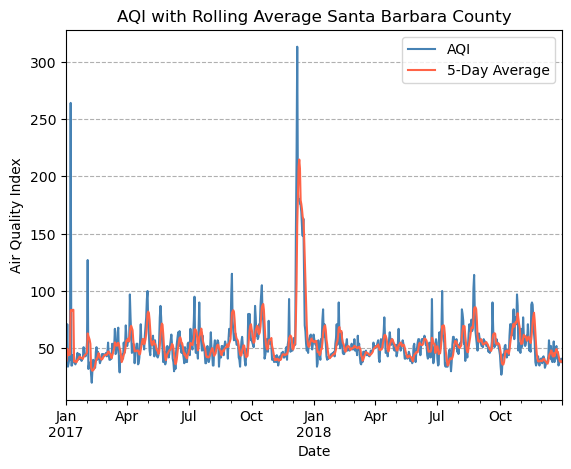

In [34]:


aqi_plot = aqi_sb.plot(kind = 'line',
            y = ['aqi', 'five_day_average'],
            xlabel = 'Date',
            ylabel = 'Air Quality Index',
            title = 'AQI with Rolling Average Santa Barbara County',
            color = ['steelblue', 'tomato'])

aqi_plot.legend(['AQI', '5-Day Average'])
aqi_plot.grid(True, axis = 'y', linestyle='--')

In [20]:
aqi_sb.head()

,state_name,county_name,state_code,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
date,,,,,,,,,,
2017-01-01,California,Santa Barbara,6,83,39,Good,Ozone,06-083-4003,12,39.000000
2017-01-02,California,Santa Barbara,6,83,39,Good,PM2.5,06-083-2011,11,39.000000
2017-01-03,California,Santa Barbara,6,83,71,Moderate,PM10,06-083-4003,12,49.666667
2017-01-04,California,Santa Barbara,6,83,34,Good,Ozone,06-083-4003,13,45.750000
2017-01-05,California,Santa Barbara,6,83,37,Good,Ozone,06-083-4003,12,44.000000


---

To double-check your work, the cell below will rerun all of the autograder tests.

In [36]:
grader.check_all()

q3_a results: All test cases passed!

q4 results: All test cases passed!

q6a results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!

<!-- END QUESTION -->

## 11


Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).